##데이터 확인

In [132]:
### 이곳에서 과제를 진행해 주세요 ### 
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
df = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', sep=';')

In [134]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [136]:
!pip install -U pandas-profiling

In [137]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [138]:
df['y'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0)

타겟 분포도

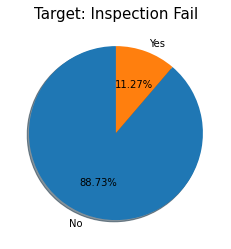

In [139]:
import matplotlib.pyplot as plt
n_zero_label = df['y'].value_counts()[0]
n_one_label = df['y'].value_counts()[1]


plt.pie(
    (n_zero_label, n_one_label),
    labels=('No', 'Yes'),
    autopct="%.2f%%",
    shadow=True,
    startangle=90,
)
plt.title("Target: Inspection Fail", size=15)
plt.show()

In [140]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

은행 고객 데이터

In [141]:
df_data = df.iloc[:, 0:7]
df_data

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [142]:
print('job', df_data['job'].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [143]:
print('marital',df_data['marital'].unique())

marital ['married' 'single' 'divorced' 'unknown']


In [144]:
print('education', df_data['education'].unique())

education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [145]:
print('default',df_data['default'].unique())
print('housing',df_data['housing'].unique())
print('loan',df_data['loan'].unique())

default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']


고객의 나이 

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

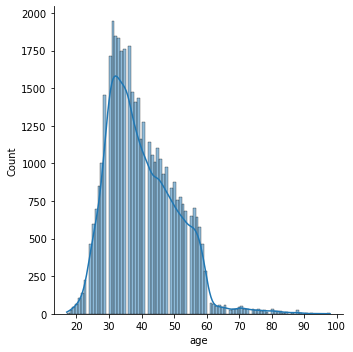

In [146]:
%matplotlib inline
import seaborn as sns

sns.displot(df_data['age'], kde=True);
df_data['age'].describe()


고객의 개인 대출 유무 비율

In [147]:
def pie_chart(df, target):
  n_zero_label = df[target].value_counts()[0]
  n_one_label = df[target].value_counts()[1]
  n_two_label = df[target].value_counts()[2]

  plt.pie(
      (n_zero_label, n_one_label, n_two_label),
      labels=('No', 'Yes', 'unknown'),
      autopct="%.2f%%",
      shadow=True,
      startangle=90,
  )
  plt.title("Target:" + target, size=15)
  return plt.show()

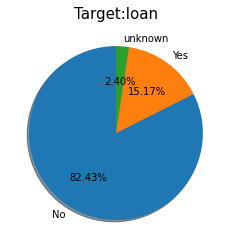

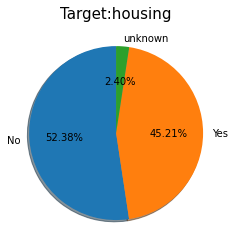

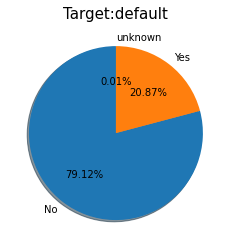

In [148]:
pie_chart(df_data,'loan')
pie_chart(df_data,'housing')
pie_chart(df_data, 'default')

In [149]:
def count_val(df, target):
  fig, ax = plt.subplots()
  fig.set_size_inches(19, 4)
  sns.countplot(x = target, data = df)
  ax.tick_params(labelsize=12)
  return sns.despine()


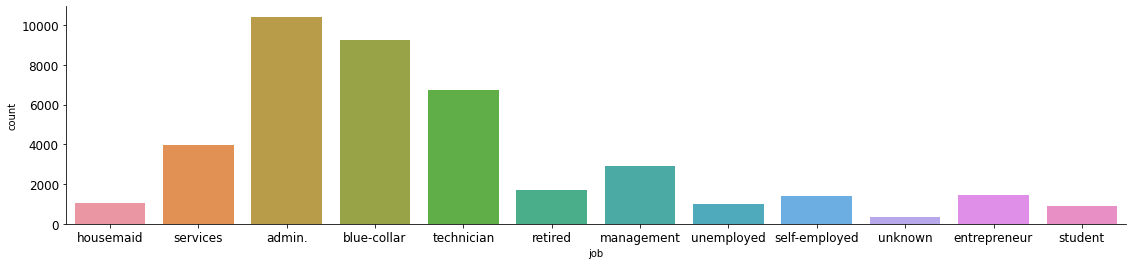

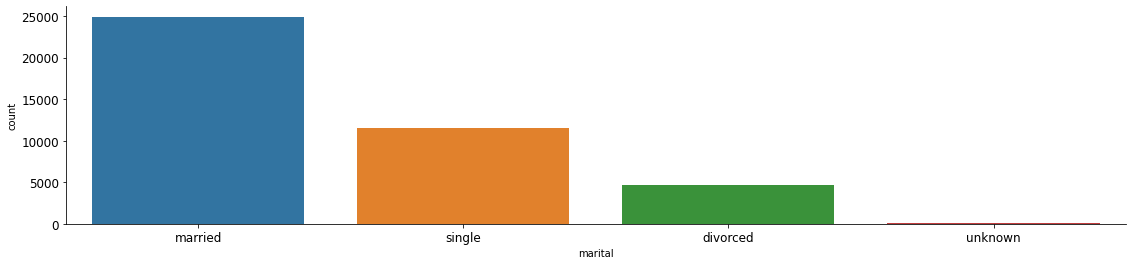

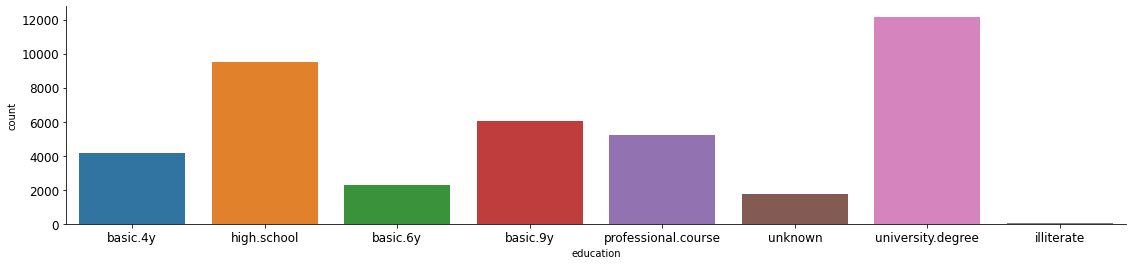

In [150]:
count_val(df_data, 'job')
count_val(df_data, 'marital')
count_val(df_data, 'education')

In [151]:
df_call = df.iloc[:,7:11]
df_call

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442


In [152]:
print('contact', df_call['contact'].unique())
print('month', df_call['month'].unique())
print('day_of_week', df_call['day_of_week'].unique())


contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']


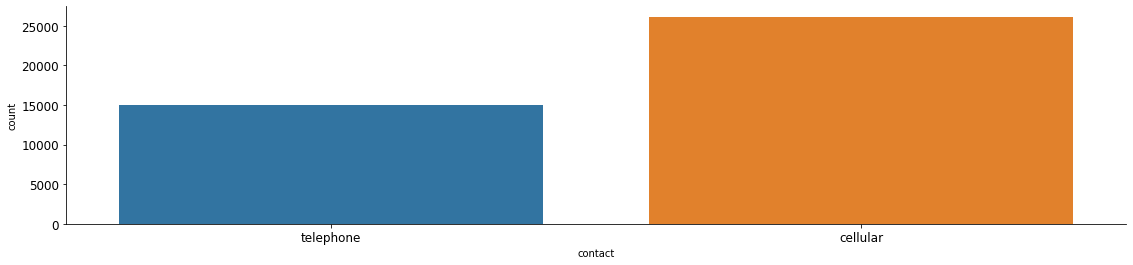

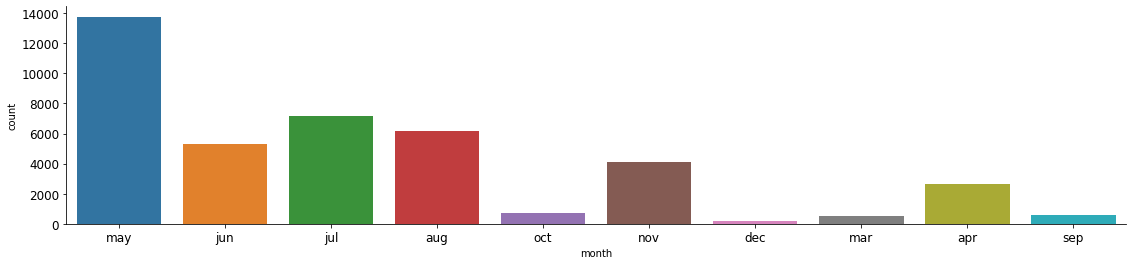

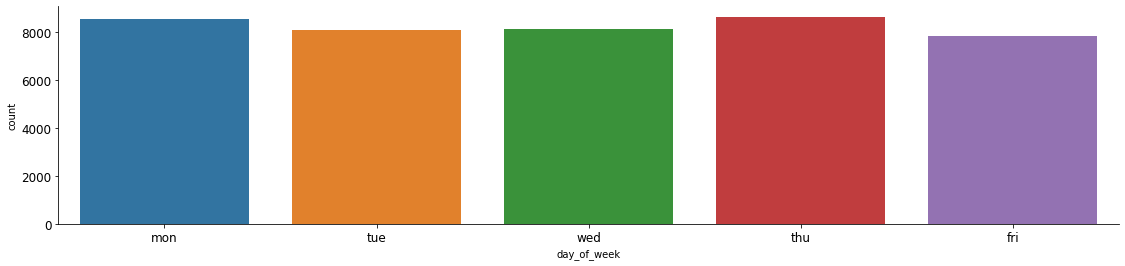

In [153]:
count_val(df_call, 'contact')
count_val(df_call, 'month')
count_val(df_call, 'day_of_week')

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

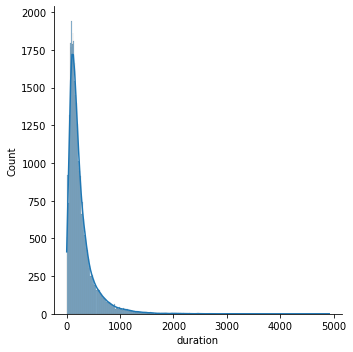

In [154]:
sns.displot(df_call['duration'], kde=True);

df_call['duration'].describe()

기타 속성

In [155]:
df_etc = df.iloc[:, 11:15]
df_etc

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


캠페인과 연락 된 일수가 오래되었으면 999로 처리됨

In [156]:
print('pdays',df_etc['pdays'].unique())
print('poutcome',df_etc['poutcome'].unique())

pdays [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
poutcome ['nonexistent' 'failure' 'success']


In [157]:
df_social = df.iloc[:,15:20]
df_social

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


In [158]:
from sklearn.model_selection import train_test_split

In [159]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2, stratify=df['y'], random_state=10)
train, val = train_test_split(train, train_size=0.75, test_size=0.25, stratify=train['y'], random_state=10)

X_train = train.drop(columns='y')
X_test = test.drop(columns='y')
X_val = val.drop(columns='y')

y_train = train['y']
y_test = test['y']
y_val = val['y']

In [160]:
train.shape, val.shape, test.shape

((24712, 21), (8238, 21), (8238, 21))

In [161]:
!pip install --upgrade category_encoders

In [162]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from category_encoders import OrdinalEncoder
from scipy.stats import randint, uniform
import numpy as np
pipe = make_pipeline(
    OrdinalEncoder(), 
    RandomForestClassifier(random_state=2)
)

dists = {
    'randomforestclassifier__n_estimators': randint(10, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 30, None], 
    'randomforestclassifier__max_features': ['auto', 'log2'],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample']
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions = dists,
    random_state = 42,
    n_iter = 10,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)


In [163]:
clf.fit(X_train, y_train)
print("Best CV accuracy", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV accuracy 0.9139693354095041
Best CV params {'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 170}


In [164]:
from sklearn.metrics import classification_report

print('검증 정확도', clf.score(X_val, y_val))

print(classification_report(y_val, clf.predict(X_val)))

검증 정확도 0.9133284777858703
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.64      0.53      0.58       928

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



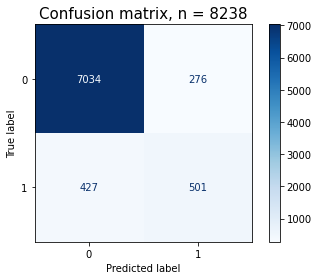

In [165]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()



In [166]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

In [167]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.9124787569798495


In [168]:
!pip install eli5

In [169]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(
    pipe.named_steps['rf'], 
    scoring='accuracy', 
    n_iter=5, 
    random_state=2
)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

permuter.fit(X_val_transformed, y_val);

In [170]:
feature_names = list(X_train.columns)


In [171]:
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.0472 ± 0.0041,duration
0.0042 ± 0.0006,euribor3m
0.0039 ± 0.0009,pdays
0.0033 ± 0.0022,nr.employed
0.0011 ± 0.0011,contact
0.0011 ± 0.0029,emp.var.rate
0.0009 ± 0.0016,month
0.0008 ± 0.0005,age
0.0007 ± 0.0011,marital
0.0006 ± 0.0011,poutcome


# 중복값 확인후 제거